# Evolution of Einstein's equations

# Initial data constants definition

# Initial data , setting length of the domain and discretization


In [47]:
m=1;
res=m;
N=2.0^m*100.0;
Rf=40.0;

dx=Rf/N;
dt=round(dx*0.4,digits=10);
Nt=100.0*2^m;
Tf=Nt*dt; #final time

println("the final time is ", Tf)

the final time is 16.0


In [48]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)
println("epsilon <= dx/dt * (1/2)^(2*2-1) = ", dx/dt*(1/2)^(2*2-1))

println("epsilon = dx/dt * (1/2)^(2*2) = ", dx/dt*(1/2)^(2*2))

println("epsilon = dx/dt * (1/2)^(2*3) = ", dx/dt*(1/2)^(2*3))

dx =0.2
dt =0.08
dx/dt =2.5
epsilon <= dx/dt * (1/2)^(2*2-1) = 0.3125
epsilon = dx/dt * (1/2)^(2*2) = 0.15625
epsilon = dx/dt * (1/2)^(2*3) = 0.0390625


In [49]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/ScalarField/DATA/res$res"

"/home/rita13santos/Desktop/MSc Thesis/ScalarField/DATA/res1"

In [50]:
println(dx)
println(dt)

0.2
0.08


In [51]:
epsilon=0.01##0.01#0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)

0.01

# Grid

In [52]:
ori=0.0;
R1 = nothing
R1=range(ori, stop=Rf, step=dx);

print(size(R1))

(201,)

In [53]:
print(dx)
#R = range(ori-2.0*dx, stop=Rf+2.0*dx, step=dx);
R = range(round(ori-3.0*dx,digits=10), stop=Rf+3.0*dx, step=dx)

L=length(R);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
T=range(0,stop=Tf-dt,step=dt)
println("the time step is ", dt)
println(size(T))
println(size(R))

println(R[L-3])
println(L)

0.2step size is  0.2
the time step is 0.08
(200,)
(207,)
40.0
207


In [63]:
include("./ScalarField.jl");

# Initial data of m β Ψ and Ψ,x

In [64]:
initm=zeros(L).+1;
initbeta=zeros(L);
initpsi=zeros(L).+1;
initpsibar=zeros(L);
state_array=[initm initbeta initpsi initpsibar];

#PSI BAR
sigma = 0.3
r0 = 0.7
psibar0=1
#initpsibar[4:L-3] = exp.(-((R1 ./ (1 .- R1) .- r0) ./ sigma) .^2) .* R1 .^2 .* (3 .* (R1 .- 1) .^2 .* sigma^2 - 2 .* R1 .* (r0 .* (R1 .- 1) .+ R1)) .* (R1 .- 1).^(-6) .*sigma^(-2)
initpsibar[4:L-3] = rungekutta4(SFconstraint_psibar,psibar0,R1)

#PSI
psi0=0
initpsi[4:L-3]=sin.(R1)#rk4wrapper(SFconstraint_psi,psi0,R1,0)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);

#BETA
beta0=0
#initbeta[4:L-3]=rk4wrapper(SFconstraint_beta,beta0,R1,0) HERE

print(initbeta)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);

"""f0=0;
g0=-sin(40);

initf[4:L-3]=rk4wrapper(TMconstraint_f,f0,R1,0)

initg[4:L-3] = sin.(R1.*(4.0*pi)/10.0)"""

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

"f0=0;\ng0=-sin(40);\n\ninitf[4:L-3]=rk4wrapper(TMconstraint_f,f0,R1,0)\n\ninitg[4:L-3] = sin.(R1.*(4.0*pi)/10.0)"

# Defining the initial state array for the evolution

In [65]:
int(x) = floor(Int, x)
print(int.([0.2 1.9]))

a=R1/dx
println(a[3])
println((R1/dx)[3])
println(state_array[Int8((R1/dx)[1])+1,4])
println(state_array[Int8((R1[1]/dx+1)),4])
println(state_array[1,4])

println(state_array[int.(R1./dx.+1),4])
println(state_array[:,4])

[0 1]2.0
2.0
0.8018435219331463
0.8018435219331463
0.8018435219331463
[0.8018435219331463, 0.9132408453227878, 0.9785088821006807, 1.0, 0.9800665667539209, 0.9210609500956186, 0.8253355177582686, 0.6967065406500912, 0.5403020501761794, 0.3623573998088172, 0.16996668122133526, -0.029200094760204187, -0.22720277728452334, -0.4161476242329745, -0.5885020008076667, -0.737394681910254, -0.8568897862032021, -0.9422234209669584, -0.9899936034693485, -0.9982958872815302, -0.9667992865472833, -0.8967594713446112, -0.7909687080822263, -0.6536445406493415, -0.49026165025003626, -0.3073335971400055, -0.11215314553389324, 0.08749847589029702, 0.2836617870235073, 0.46851637567998133, 0.6346926727523728, 0.7755657536760354, 0.8855194532652565, 0.9601702644963775, 0.9965420950998711, 0.9931849149675246, 0.9502325642770201, 0.8693974177064075, 0.753902117459401, 0.6083510966903529, 0.43854701528451834, 0.2512594261197827, 0.05395489435597961, -0.14550067095592287, -0.33915560584537285, -0.5192894991718

In [66]:
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);
using CSV, Tables
CSV.write(dir*"/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/ScalarField/DATA/res1/time_step0.csv"

## # Defining the initial state array for the evolution

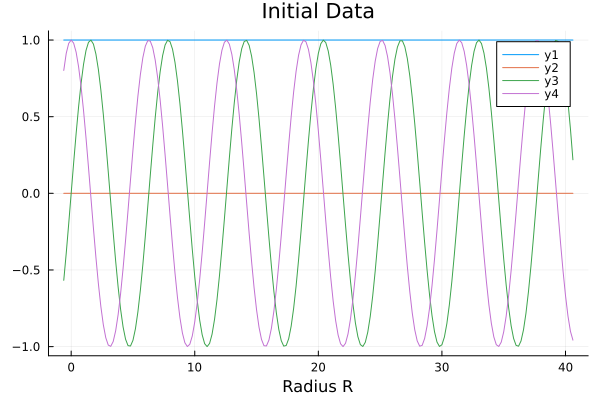

In [67]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, state_array, xaxis="Radius R",title="Initial Data")

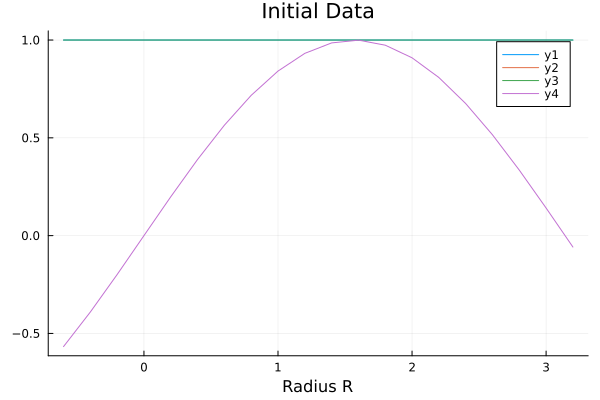

In [320]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R[1:20], state_array[1:20,:], xaxis="Radius R",title="Initial Data")

 ## Evolution

In [48]:
using ProgressMeter
@showprogress for k in 1:length(T)
    state_array=rungekutta4molstep(TMRHS,state_array,T,k,0) 
    #state_array=ghost(state_array)
     CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In [32]:
print(Tables.table(state_array))

Tables.MatrixTable{Matrix{Float64}} with 407 rows, 2 columns, and schema:
 :Column1  Float64
 :Column2  Float64

In [33]:
print(dir)

/home/rita13santos/Desktop/MSc Thesis/DATA/res2

## Movie of the evolution

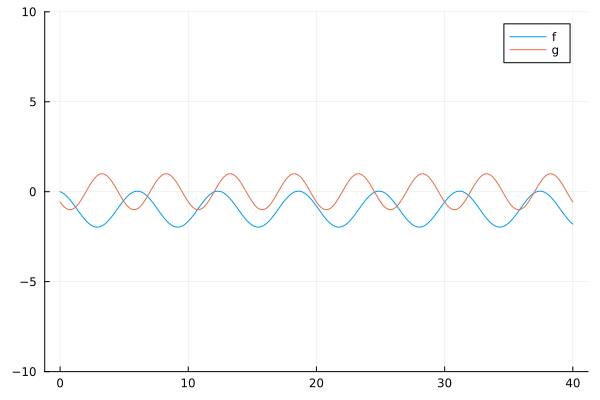

In [34]:
using Plots, CSV, DataFrames
import GR
for n in 1:1:length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
    d=round(T[n],digits=1)
    plot!(R1, [plot1 plot2], labels=["f" "g"],ylims=(-10,10)) |> display 
    
    end

In [56]:
print(maximum(initpsibar))

NaN

Save image

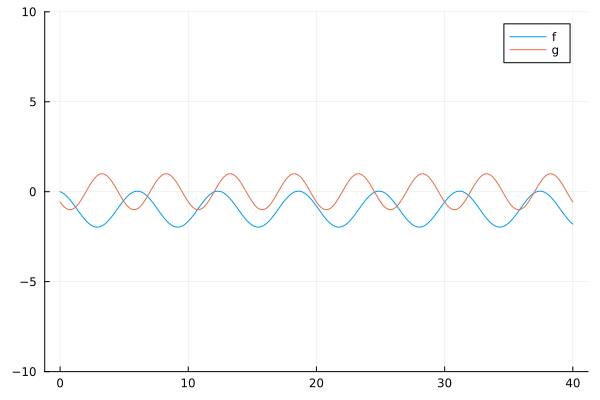

┌ Info: Saved animation to 
│   fn = /home/rita13santos/Desktop/MSc Thesis/anim_res2.gif
└ @ Plots /home/rita13santos/.julia/packages/Plots/fw4rv/src/animation.jl:156


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/anim_res2.gif")
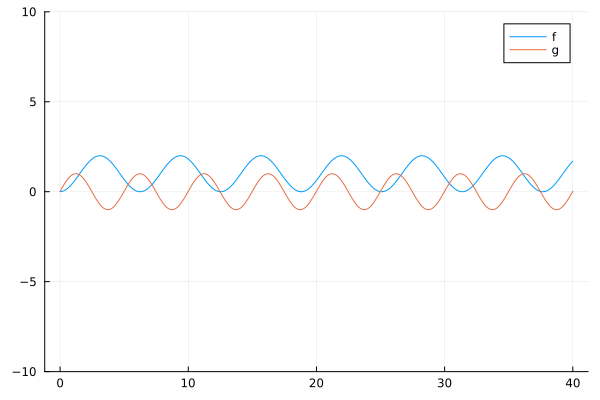

In [35]:
anim = @animate for n in 1:1:length(T)-1
time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
    d=round(T[n],digits=1)
    plot!(R1, [plot1 plot2], labels=["f" "g"],ylims=(-10,10)) |> display 
    
end
gif(anim, "anim_res$res.gif", fps = 15)